Spliting dataset in training and test dataset
Referance: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6?gi=2d29bc955383
Feature Analysing was inspired by
Referance: https://www.youtube.com/watch?v=f1y9wDDxWnA

In [1]:
#installing any package


In [2]:
import pandas as pd
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
import pandas as pd
from fbprophet import Prophet

In [3]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
from scipy.stats import invgauss

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Diabetes dataset
data = pd.read_csv("covid_19_data_Bangladesh.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,4127,3/8/2020,NaN,Bangladesh,2020-03-08T10:53:02,3,0,0
1,4386,3/9/2020,NaN,Bangladesh,2020-03-08T10:53:02,3,0,0
2,4659,3/10/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0
3,4878,3/11/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0
4,5099,3/12/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0


In [5]:
# create training and testing vars
train, test = train_test_split(data, test_size=0.15, random_state = 0)
print (train.shape)
print (test.shape)

(46, 8)
(9, 8)


In [6]:
train.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
30,12580,4/7/2020,NaN,Bangladesh,4/7/2020 23:11,164,17,33
4,5099,3/12/2020,NaN,Bangladesh,2020-03-10T06:19:32,3,0,0
10,6624,3/18/2020,NaN,Bangladesh,2020-03-18T11:33:04,14,1,3
28,11941,4/5/2020,NaN,Bangladesh,4/5/2020 23:13,88,9,33
22,10057,3/30/2020,NaN,Bangladesh,3/8/2020 5:31,49,5,19


In [7]:
test.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
45,17382,4/22/2020,NaN,Bangladesh,4/22/2020 23:38,3772,120,92
33,13540,4/10/2020,NaN,Bangladesh,4/10/2020 23:01,424,27,33
40,15782,4/17/2020,NaN,Bangladesh,4/17/2020 23:38,1838,75,58
26,11310,4/3/2020,NaN,Bangladesh,4/3/2020 22:52,61,6,26
11,6907,3/19/2020,NaN,Bangladesh,2020-03-19T10:53:03,17,1,3


In [8]:
train.describe()

,SNo,Province/State,Confirmed,Deaths,Recovered
count,46.000000,0.0,46.000000,46.000000,46.000000
mean,11573.326087,NaN,1423.652174,41.173913,41.913043
std,4934.436917,NaN,2428.338620,57.949136,49.727178
min,4127.000000,NaN,3.000000,0.000000,0.000000
25%,7534.000000,NaN,25.500000,2.000000,3.000000
50%,10838.500000,NaN,55.000000,6.000000,25.000000
75%,15382.000000,NaN,1486.750000,57.500000,49.000000
max,20264.000000,NaN,8238.000000,170.000000,174.000000


Data Description
SNo-Random number
ObservationDate-the date observed
Province/State-NaN
Country/Region-Bangladesh
Last Update-the dates
Confirmed-case detected
Deaths-death ratings
Recovered-the people who recovered

What are the missing values?
Conclusion: We don't need province and count in our featue analysis

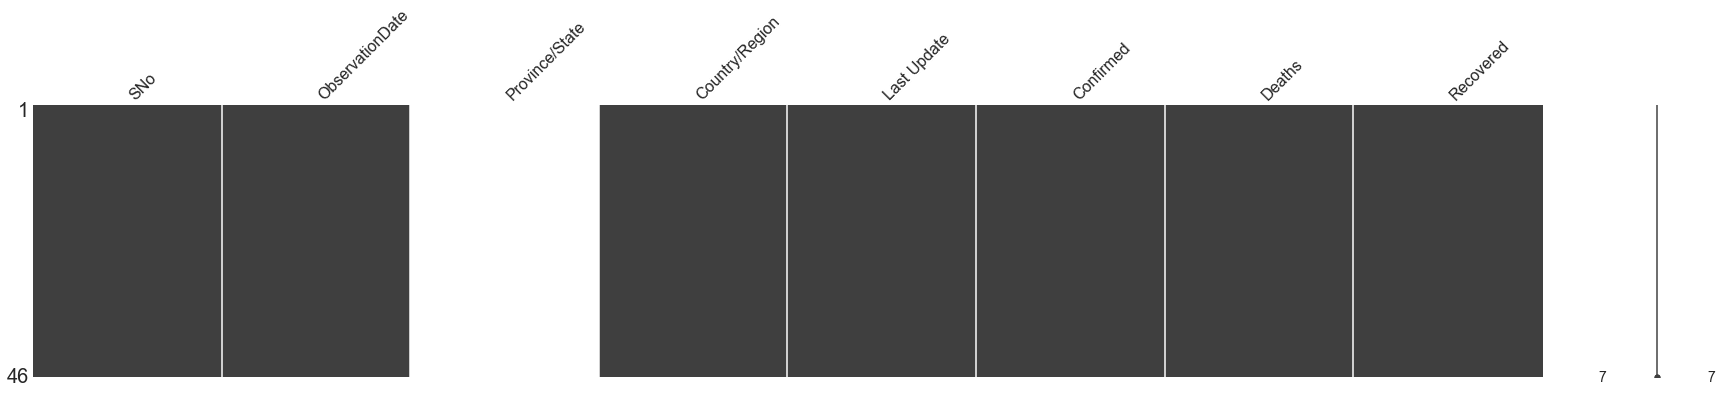

In [9]:
#Plot graphic of missing value
missingno.matrix(train, figsize = (30,5))

In [10]:
#to perform data analysis we create data frame
df_bin = pd.DataFrame() #for discreated continuous variable
df_con = pd.DataFrame() #for continuous variables

What datatypes are in the dataframe?
As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind.

In [11]:
train.dtypes

SNo                  int64
ObservationDate     object
Province/State     float64
Country/Region      object
Last Update         object
Confirmed            int64
Deaths               int64
Recovered            int64
dtype: object

Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

Target Feature: SNo
Data type = different integers

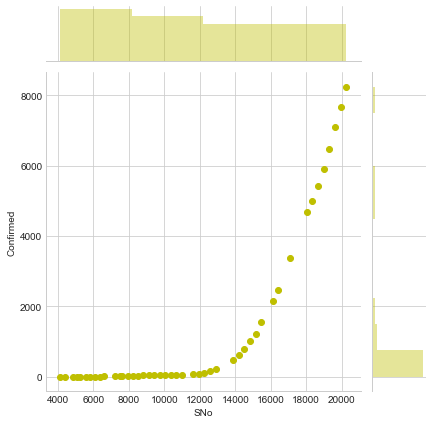

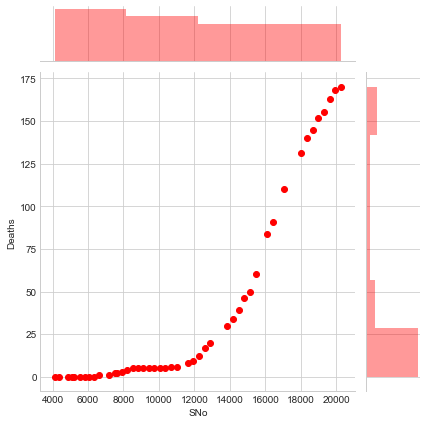

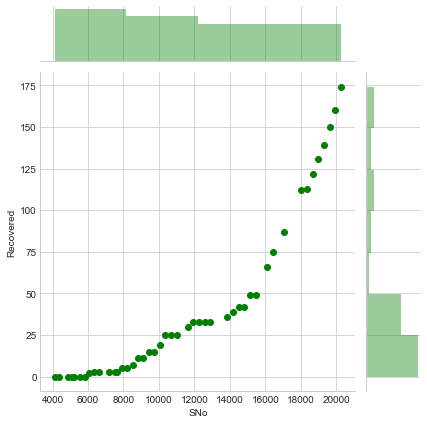

In [12]:
# How many people confirmed/death/recovered in context of SNo?
sns.jointplot(x='SNo', y="Confirmed", data=train, color = "y");

sns.jointplot(x='SNo', y="Deaths", data=train, color="r");

sns.jointplot(x='SNo', y="Recovered", data=train, color= "g");

In [13]:
# Let's add this to our subset dataframes
df_bin['SNo'] = train['SNo']
df_con['SNo'] = train['SNo']

In [14]:
df_bin.head()

,SNo
30,12580
4,5099
10,6624
28,11941
22,10057


In [15]:
df_con.head()

,SNo
30,12580
4,5099
10,6624
28,11941
22,10057


Target Feature: ObservationDate 
Data type = different integers

<Figure size 1080x72 with 0 Axes>

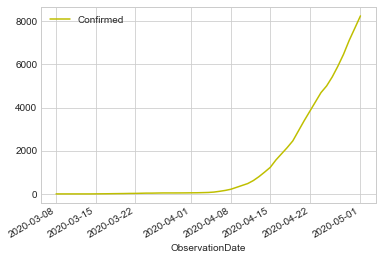

<Figure size 1080x72 with 0 Axes>

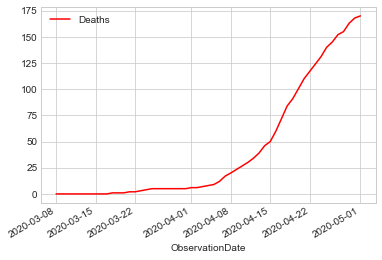

<Figure size 1080x72 with 0 Axes>

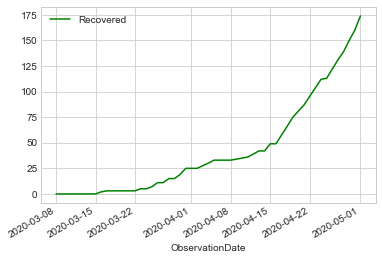

In [16]:
# How many people confirmed/death/recovered in context of ObservationDate?
train['ObservationDate'] = pd.to_datetime(train['ObservationDate'])

fig = plt.figure(figsize=(15,1))
train[['ObservationDate','Confirmed']].set_index('ObservationDate').plot(color = "y")

fig = plt.figure(figsize=(15,1))
train[['ObservationDate','Deaths']].set_index('ObservationDate').plot(color = "r")

fig = plt.figure(figsize=(15,1))
train[['ObservationDate','Recovered']].set_index('ObservationDate').plot(color = "g")

In [17]:
# Let's add this to our subset dataframes
df_bin['ObservationDate'] = train['ObservationDate']
df_con['ObservationDate'] = train['ObservationDate']

In [18]:
df_bin.head()

,SNo,ObservationDate
30,12580,2020-04-07
4,5099,2020-03-12
10,6624,2020-03-18
28,11941,2020-04-05
22,10057,2020-03-30


In [19]:
df_con.head()

,SNo,ObservationDate
30,12580,2020-04-07
4,5099,2020-03-12
10,6624,2020-03-18
28,11941,2020-04-05
22,10057,2020-03-30


In [20]:
df_bin.head()

,SNo,ObservationDate
30,12580,2020-04-07
4,5099,2020-03-12
10,6624,2020-03-18
28,11941,2020-04-05
22,10057,2020-03-30


In [21]:
df_con.head()

,SNo,ObservationDate
30,12580,2020-04-07
4,5099,2020-03-12
10,6624,2020-03-18
28,11941,2020-04-05
22,10057,2020-03-30


Target Feature: Last Update
Data type = floating points and string

<Figure size 1080x72 with 0 Axes>

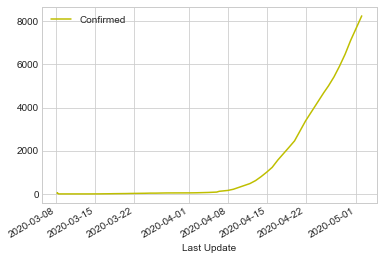

<Figure size 1080x72 with 0 Axes>

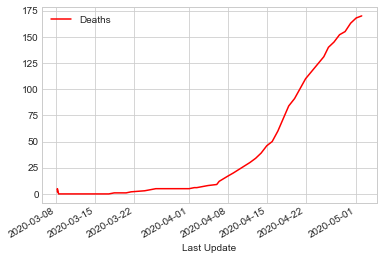

<Figure size 1080x72 with 0 Axes>

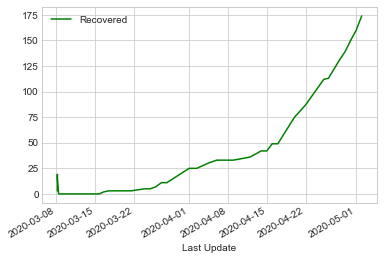

In [22]:
# How many people confirmed/death/recovered in context of LastUpdate?
train['Last Update'] = pd.to_datetime(train['Last Update'])

fig = plt.figure(figsize=(15,1))
train[['Last Update','Confirmed']].set_index('Last Update').plot(color = "y")

fig = plt.figure(figsize=(15,1))
train[['Last Update','Deaths']].set_index('Last Update').plot(color = "r")

fig = plt.figure(figsize=(15,1))
train[['Last Update','Recovered']].set_index('Last Update').plot(color = "g")

In [23]:
df_bin['Last Update'] = train['Last Update']
df_con['Last Update'] = train['Last Update']

In [24]:
df_bin.head()

,SNo,ObservationDate,Last Update
30,12580,2020-04-07,2020-04-07 23:11:00
4,5099,2020-03-12,2020-03-10 06:19:32
10,6624,2020-03-18,2020-03-18 11:33:04
28,11941,2020-04-05,2020-04-05 23:13:00
22,10057,2020-03-30,2020-03-08 05:31:00


In [25]:
df_con.head()

,SNo,ObservationDate,Last Update
30,12580,2020-04-07,2020-04-07 23:11:00
4,5099,2020-03-12,2020-03-10 06:19:32
10,6624,2020-03-18,2020-03-18 11:33:04
28,11941,2020-04-05,2020-04-05 23:13:00
22,10057,2020-03-30,2020-03-08 05:31:00


In [26]:
df_bin['Confirmed'] = train['Confirmed']
df_con['Confirmed'] = train['Confirmed']

df_bin['Deaths'] = train['Deaths']
df_con['Deaths'] = train['Deaths']

df_bin['Recovered'] = train['Recovered']
df_con['Recovered'] = train['Recovered']

In [27]:
df_bin.head()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
30,12580,2020-04-07,2020-04-07 23:11:00,164,17,33
4,5099,2020-03-12,2020-03-10 06:19:32,3,0,0
10,6624,2020-03-18,2020-03-18 11:33:04,14,1,3
28,11941,2020-04-05,2020-04-05 23:13:00,88,9,33
22,10057,2020-03-30,2020-03-08 05:31:00,49,5,19


In [28]:
df_con.head()

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
30,12580,2020-04-07,2020-04-07 23:11:00,164,17,33
4,5099,2020-03-12,2020-03-10 06:19:32,3,0,0
10,6624,2020-03-18,2020-03-18 11:33:04,14,1,3
28,11941,2020-04-05,2020-04-05 23:13:00,88,9,33
22,10057,2020-03-30,2020-03-08 05:31:00,49,5,19


In [29]:
print(len(df_bin))

46


In [30]:
print(len(df_con))

46


Referance: https://www.kaggle.com/khoongweihao/covid-19-novel-coronavirus-eda-forecasting-cases?fbclid=IwAR0FgRqSJFSgxkOoRX2r4JPg84y7F1L2Ky-pmJDAQmvEBLySjNBsnzWV41g
Prophet
We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. It is also an open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

In [31]:
confirmed = df_con.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df_con.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df_con.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [32]:
confirmed.head()

,ObservationDate,Confirmed
0,2020-03-08,3
1,2020-03-09,3
2,2020-03-11,3
3,2020-03-12,3
4,2020-03-13,3


In [33]:
deaths.head()

,ObservationDate,Deaths
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-11,0
3,2020-03-12,0
4,2020-03-13,0


In [34]:
recovered.head()

,ObservationDate,Recovered
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-11,0
3,2020-03-12,0
4,2020-03-13,0


Data Preparation
As we are now forecasting at country and state/province level, for small values, it is possible for forecasts to become negative. To counter this, we round negative values to zero. To perform forecast evaluations using mean absolute error (MAE), we require to partition the dataset into train & validation sets. Here, the test set will contain the dates for which the Prophet model is trained on and where forecasts were made.

In [35]:
days_to_forecast = 30 # changable
first_forecasted_date = sorted(list(set(df_con['ObservationDate'].values)))[-days_to_forecast]

print('The first date to perform forecasts for is: ' + str(first_forecasted_date))

The first date to perform forecasts for is: 2020-03-26T00:00:00.000000000


In [36]:
confirmed_df = df_con[['SNo', 'ObservationDate', 'Last Update', 'Confirmed']]
confirmed_df.tail()

,SNo,ObservationDate,Last Update,Confirmed
51,19299,2020-04-28,2020-04-29 02:32:00,6462
3,4878,2020-03-11,2020-03-10 06:19:32,3
0,4127,2020-03-08,2020-03-08 10:53:02,3
47,18021,2020-04-24,2020-04-25 06:31:00,4689
44,17062,2020-04-21,2020-04-21 23:39:00,3382


In [37]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [38]:
confirmed.head()

,ds,y
0,2020-03-08,3
1,2020-03-09,3
2,2020-03-11,3
3,2020-03-12,3
4,2020-03-13,3


In [39]:
deaths_df = df_con[['SNo', 'ObservationDate', 'Last Update', 'Deaths']]
deaths_df.tail()

,SNo,ObservationDate,Last Update,Deaths
51,19299,2020-04-28,2020-04-29 02:32:00,155
3,4878,2020-03-11,2020-03-10 06:19:32,0
0,4127,2020-03-08,2020-03-08 10:53:02,0
47,18021,2020-04-24,2020-04-25 06:31:00,131
44,17062,2020-04-21,2020-04-21 23:39:00,110


In [40]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [41]:
recovered_df = df_con[['SNo', 'ObservationDate', 'Last Update', 'Recovered']]
recovered_df.tail()

,SNo,ObservationDate,Last Update,Recovered
51,19299,2020-04-28,2020-04-29 02:32:00,139
3,4878,2020-03-11,2020-03-10 06:19:32,0
0,4127,2020-03-08,2020-03-08 10:53:02,0
47,18021,2020-04-24,2020-04-25 06:31:00,112
44,17062,2020-04-21,2020-04-21 23:39:00,87


In [42]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(confirmed['ds'])

Data Forecasting

Confirmed

In [43]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
71,2020-05-27
72,2020-05-28
73,2020-05-29
74,2020-05-30
75,2020-05-31


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2020-05-27,7952.858140,5577.275021,10506.869659
72,2020-05-28,8364.504265,5840.032896,10774.407556
73,2020-05-29,9265.716599,6563.322382,11879.016914
74,2020-05-30,7948.635845,5300.257990,10396.143920
75,2020-05-31,8347.988819,5868.448676,10813.269706


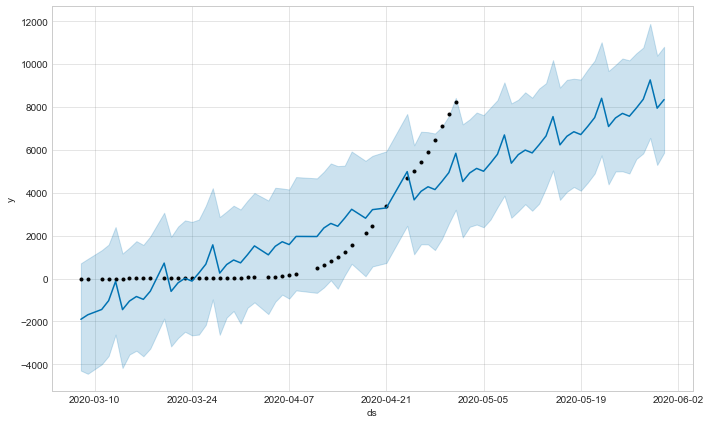

In [45]:
confirmed_forecast_plot = m.plot(forecast)

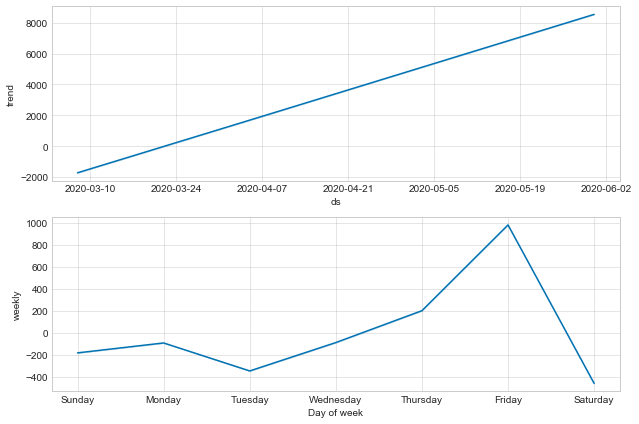

In [46]:
forecast_components = m.plot_components(forecast)

Deaths

In [47]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=30)
future_deaths = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
71,2020-05-27
72,2020-05-28
73,2020-05-29
74,2020-05-30
75,2020-05-31


In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2020-05-27,208.478864,157.927660,260.605762
72,2020-05-28,215.599636,166.969190,270.935673
73,2020-05-29,233.581891,178.592815,285.111614
74,2020-05-30,215.086843,161.650531,270.802848
75,2020-05-31,223.426603,174.131228,272.122467


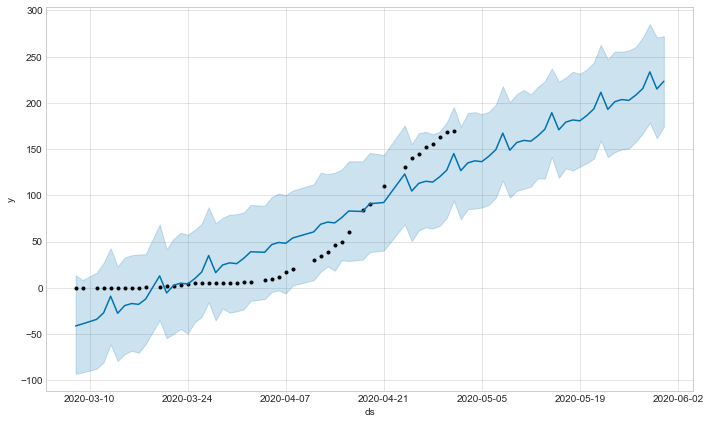

In [49]:
deaths_forecast_plot = m.plot(forecast)

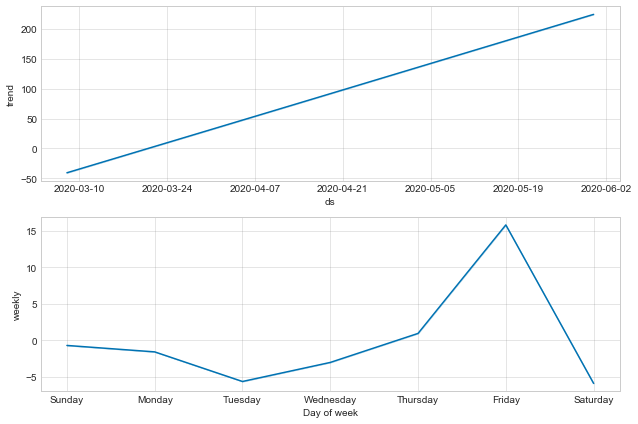

In [50]:
forecast_components = m.plot_components(forecast)

Recovered

In [51]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=30)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
71,2020-05-27
72,2020-05-28
73,2020-05-29
74,2020-05-30
75,2020-05-31


In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2020-05-27,363.822612,318.603530,405.873231
72,2020-05-28,371.147467,323.311600,415.141918
73,2020-05-29,380.510730,328.522278,426.620428
74,2020-05-30,385.718817,331.994495,432.452784
75,2020-05-31,394.057590,339.577125,444.437924


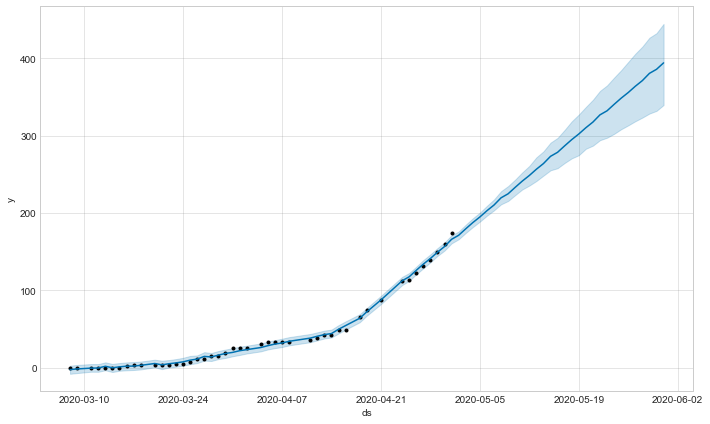

In [53]:
deaths_forecast_plot = m.plot(forecast)

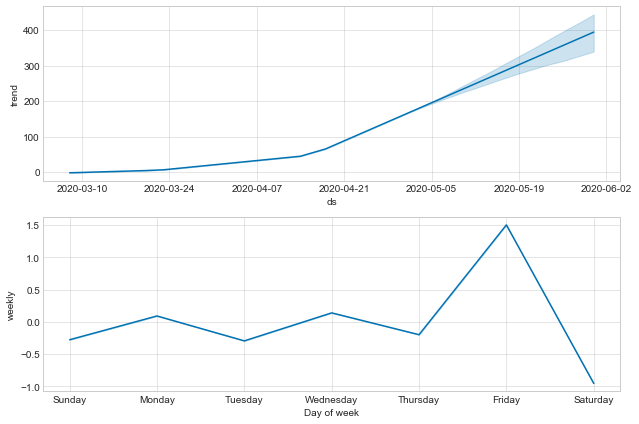

In [54]:
forecast_components = m.plot_components(forecast)